1. What if the data is not linearly separable?

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix

from seaborn import despine
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(4128)

n_samples = 50

# generate random data
X1 = []
X2 = []
for sample in range(n_samples):
    # class 1
    if np.random.uniform(0,1,1) > 0.5:
        X1.append(np.array([np.random.normal(-1,0.2,1), np.random.normal(1,0.2,1)]).reshape(1,-1))
    else:
        X1.append(np.array([np.random.normal(1,0.2,1), np.random.normal(-1,0.2,1)]).reshape(1,-1))
    # class 2  
    if np.random.uniform(0,1,1) > 0.5:
        X2.append(np.array([np.random.normal(-1,0.2,1), np.random.normal(-1,0.2,1)]).reshape(1,-1))
    else:
        X2.append(np.array([np.random.normal(1,0.2,1), np.random.normal(1,0.2,1)]).reshape(1,-1))
X = np.concatenate([np.concatenate(X1), np.concatenate(X2)])
y = np.zeros((X.shape[0],1))
y[n_samples:] = 1
y = y.astype(np.int)

# plot the training data
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[(y==0).ravel(),0], X[(y==0).ravel(),1], c='b')
ax.scatter(X[(y==1).ravel(),0], X[(y==1).ravel(),1], c='r')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
despine(ax=ax)
fig.tight_layout()

# save
fig.savefig(r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Neural_networksfig\Not-Linaerly-Separable.png', dpi=600)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

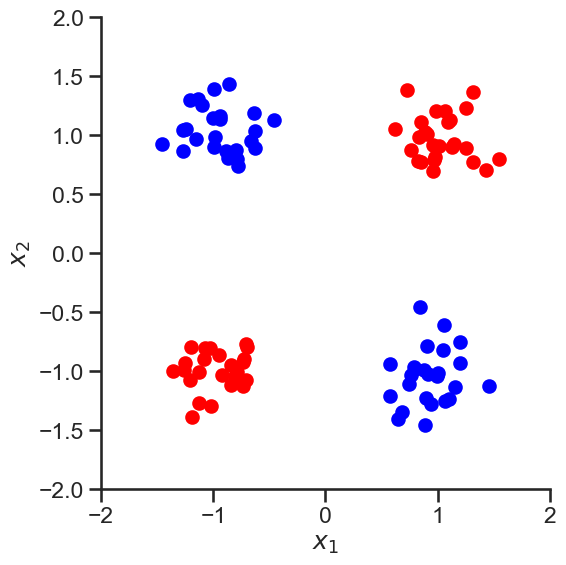

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix

from seaborn import despine
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(4128)

n_samples = 50

# generate random data
X1 = []
X2 = []
for sample in range(n_samples):
    # class 1
    if np.random.uniform(0,1,1) > 0.5:
        X1.append(np.array([np.random.normal(-1,0.2,1), np.random.normal(1,0.2,1)]).reshape(1,-1))
    else:
        X1.append(np.array([np.random.normal(1,0.2,1), np.random.normal(-1,0.2,1)]).reshape(1,-1))
    # class 2  
    if np.random.uniform(0,1,1) > 0.5:
        X2.append(np.array([np.random.normal(-1,0.2,1), np.random.normal(-1,0.2,1)]).reshape(1,-1))
    else:
        X2.append(np.array([np.random.normal(1,0.2,1), np.random.normal(1,0.2,1)]).reshape(1,-1))
X = np.concatenate([np.concatenate(X1), np.concatenate(X2)])
y = np.zeros((X.shape[0],1))
y[n_samples:] = 1
y = y.astype(np.int_)

# plot the training data
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[(y==0).ravel(),0], X[(y==0).ravel(),1], c='b')
ax.scatter(X[(y==1).ravel(),0], X[(y==1).ravel(),1], c='r')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
despine(ax=ax)
fig.tight_layout()

# save
fig.savefig(r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Neural_networksfig\Not-Linaerly-Separable.png', dpi=600)

2. XOR with multiple Perceptrons

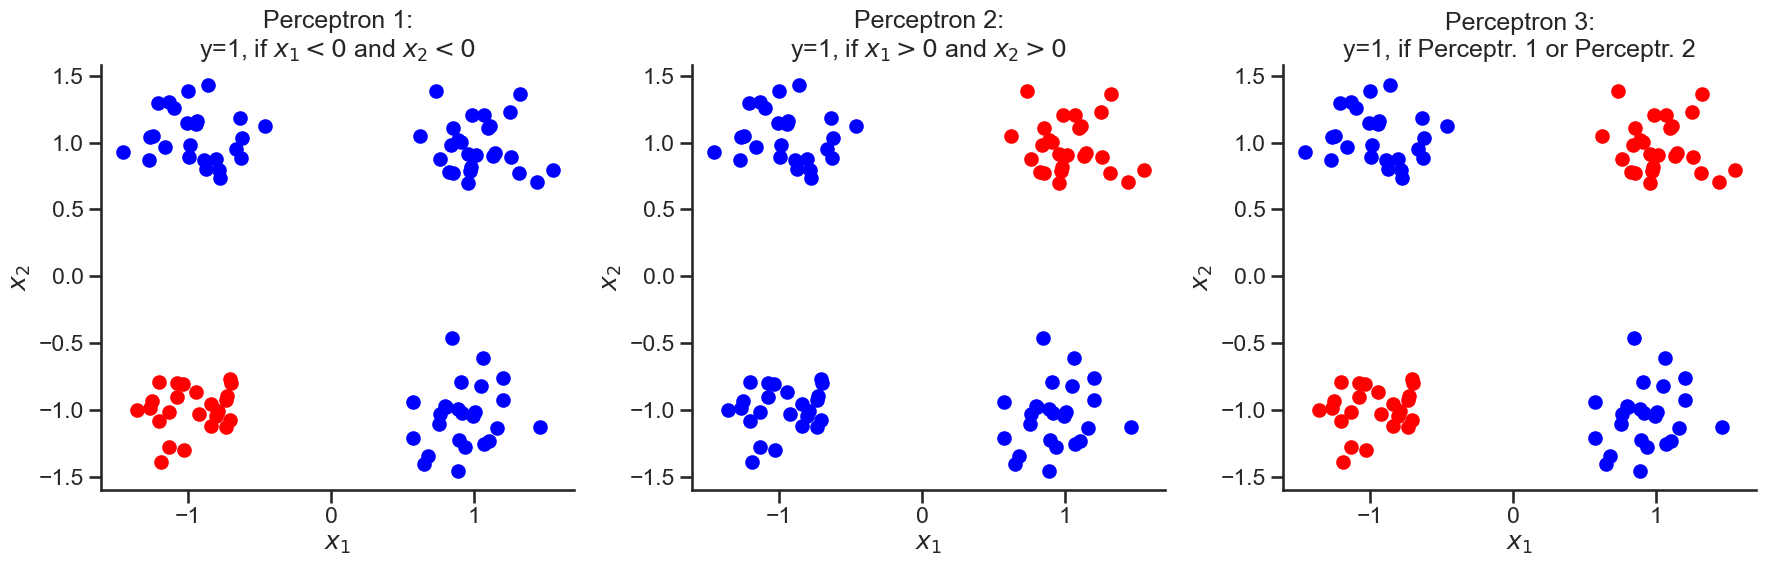

In [3]:
# setup figure
fig, axs = plt.subplots(1,3,figsize=(18,6))

# Perceptron 1
axs[0].set_title('Perceptron 1:\n'+'y=1, if '+r'$x_1<0$'+' and '+r'$x_2<0$')
idx1 = np.logical_and(X[:,0]<0, X[:,1]<0)
axs[0].scatter(X[idx1,0], X[idx1,1], color='red')
axs[0].scatter(X[~idx1,0], X[~idx1,1], color='blue')

# Perceptron 2
axs[1].set_title('Perceptron 2:\n'+'y=1, if '+r'$x_1>0$'+' and '+r'$x_2>0$')
idx2 = np.logical_and(X[:,0]>0, X[:,1]>0)
axs[1].scatter(X[idx2,0], X[idx2,1], color='red')
axs[1].scatter(X[~idx2,0], X[~idx2,1], color='blue')

# Perceptron 3
axs[2].set_title('Perceptron 3:\n'+'y=1, if Perceptr. 1 or Perceptr. 2')
idx3 = np.logical_or(idx1, idx2)
axs[2].scatter(X[idx3,0], X[idx3,1], color='red')
axs[2].scatter(X[~idx3,0], X[~idx3,1], color='blue')

# label axes
for ax in axs:
    despine(ax=ax)
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
fig.tight_layout()

# save
fig.savefig(r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Neural_networksfig\Multi-Perceptron-Classification.png', dpi=600)


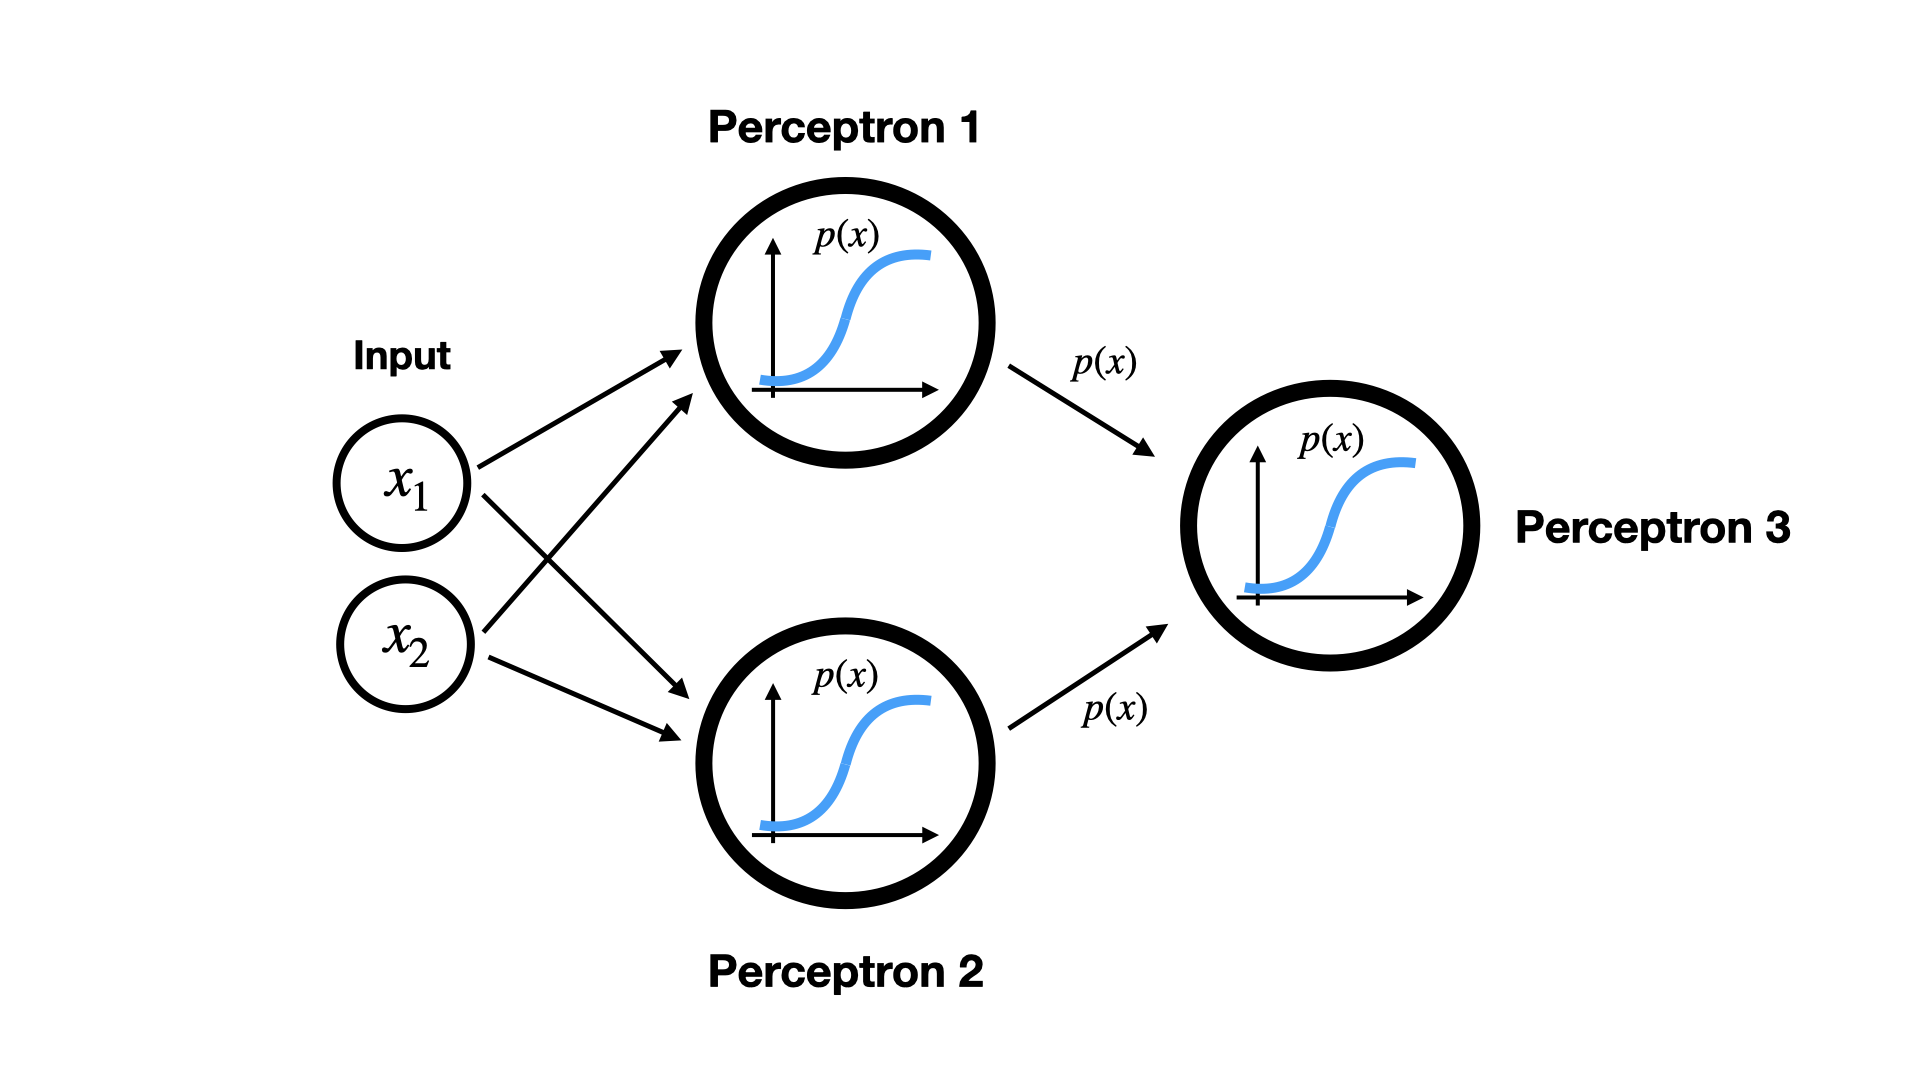

In [4]:
Image(filename=r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Neural_networksfig\Multilayer-Perceptron.png')

In [5]:
# our activation function:

def sigmoid(x):
    """the sigmoid function
    """
    return 1.0/(1.0 + np.exp(-x)) 

# our loss: 

class cross_entropy_loss:
    def __init__(self):
        self.name = 'cross-entropy'
        
    def loss(self, y, y_pred, zerotol=1e-10):
        """the binary cross-entropy loss
        
        Args:
            y (array): labels for each instance (0 or 1)
            y_pred (array): predicted probabilty that
                each instance belongs to class 1
        """
        loss = -(y * np.log(y_pred + zerotol) + (1 - y) * np.log(1 - y_pred + zerotol))
        return loss
    
    def derivative_loss(self, y, y_pred):
        """the derivative of the cross-entropy 
        loss w.r.t. to sigmoid activation
        
        Args:
            y (array): labels for each instance (0 or 1)
            y_pred (array): predicted probabilty that
                each instance belongs to class 1
        """
        return y_pred - y
    

    # the Perceptron:

class Perceptron:
    
    def __init__(self, n_in, activation=sigmoid, loss=cross_entropy_loss, b=None):
        """A simple Perceptron implementation.
        
        Args:
            n_in (int): number of input features for each instance
            activation (function): activation function of the Perceptron;
                takes individual values or array as input
            loss (class): loss function to use; 
                class is expected to include two functions:
                loss, derivative_loss (indicating the derivative
                of the loss w.r.t. to the output activation)
                see cross_entropy class above as an example
            b (float): bias term; if a value is specified, the
                bias term is fixed to this value. if not, 
                the bias will be estimated during training.
        """
        self.n_in = n_in
        self.w = np.random.uniform(-1,1,n_in)
        if b is None:
            self.b = np.random.uniform(-1,1,1)
            self.fit_b = True
        else:
            self.b = b
            self.fit_b = False
        self.activation = activation
        self.loss = loss().loss
        self.derivative_loss = loss().derivative_loss

    def predict(self, x):
        """Predict probability that each 
        instance of x (with smape n_instances x n_features)
        belongs to class 1
        
        Args:
            x (ndarray): input data (n_instances x n_features)
        """
        self.Z = np.dot(x, self.w) + self.b
        self.A = self.activation(self.Z)
        return self.A
    
    def gradient_descent_step(self, x, y, learning_rate):
        """A single gradient descent step.
        
        Args:
            x (ndarray): input data (n_instances x n_features)
            y (array): label of each instance (0 or 1)
            learning_rate (float): learning rate of gradient
                descent algorithm
        """
        # compute derivative of loss wrt Z
        dZ = self.derivative_loss(y, self.predict(x))
        dW = np.dot(dZ, x)
        # subtract average derivative from weights
        self.w -= learning_rate * 1.0/dW.shape[0] * dW
        if self.fit_b:
            self.b -= learning_rate * (1.0/x.shape[0] * np.sum(dZ))
            
    def train(self, x, y, batch_size=8, learning_rate=1, n_steps=100):
        """Iteratively train the Perceptron.
        At each iteration, the algorithm will draw 
        a random sample from x (with batch_size samples) 
        and use this sample to perform a gradient
        descent step.
        
        Args:
            x (ndarray): input data (n_instances x n_features)
            y (array): label of each instance (0 or 1)
            learning_rate (float): learning rate of gradient
                descent algorithm
            n_steps (int): number of iterations to perform
                during training
        """
        self.training_w = np.zeros((n_steps, self.n_in+1))
        self.training_loss = np.zeros(n_steps)
        for s in tqdm(range(n_steps)):
            # draw a random batch
            batch_idx = np.random.choice(x.shape[0], batch_size, replace=False)
            # compute and store mean loss
            self.training_loss[s] = np.mean(self.loss(y[batch_idx], self.predict(X[batch_idx])))
            # store current weights
            self.training_w[s,:self.n_in] = self.w
            self.training_w[s,-1] = self.b
            # perform gradient descent step
            self.gradient_descent_step(X[batch_idx], y[batch_idx], learning_rate)



# create new labels
idx1 = np.logical_and(X[:,0]<0, X[:,1]<0)
y1 = idx1.astype(np.int)

# initialize instance of Perceptron
np.random.seed(213)
p1 = Perceptron(n_in=2)

# train
p1.train(X, y1)

# predict
p1_pred = p1.predict(X)
# compute predictive accuracy
acc_p1 = np.mean((p1_pred>0.5) == y1) 
print('Prediction accuracy: {}%'.format(acc_p1*100))


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [6]:
# our activation function:

def sigmoid(x):
    """the sigmoid function
    """
    return 1.0/(1.0 + np.exp(-x)) 

# our loss: 

class cross_entropy_loss:
    def __init__(self):
        self.name = 'cross-entropy'
        
    def loss(self, y, y_pred, zerotol=1e-10):
        """the binary cross-entropy loss
        
        Args:
            y (array): labels for each instance (0 or 1)
            y_pred (array): predicted probabilty that
                each instance belongs to class 1
        """
        loss = -(y * np.log(y_pred + zerotol) + (1 - y) * np.log(1 - y_pred + zerotol))
        return loss
    
    def derivative_loss(self, y, y_pred):
        """the derivative of the cross-entropy 
        loss w.r.t. to sigmoid activation
        
        Args:
            y (array): labels for each instance (0 or 1)
            y_pred (array): predicted probabilty that
                each instance belongs to class 1
        """
        return y_pred - y
    

    # the Perceptron:

class Perceptron:
    
    def __init__(self, n_in, activation=sigmoid, loss=cross_entropy_loss, b=None):
        """A simple Perceptron implementation.
        
        Args:
            n_in (int): number of input features for each instance
            activation (function): activation function of the Perceptron;
                takes individual values or array as input
            loss (class): loss function to use; 
                class is expected to include two functions:
                loss, derivative_loss (indicating the derivative
                of the loss w.r.t. to the output activation)
                see cross_entropy class above as an example
            b (float): bias term; if a value is specified, the
                bias term is fixed to this value. if not, 
                the bias will be estimated during training.
        """
        self.n_in = n_in
        self.w = np.random.uniform(-1,1,n_in)
        if b is None:
            self.b = np.random.uniform(-1,1,1)
            self.fit_b = True
        else:
            self.b = b
            self.fit_b = False
        self.activation = activation
        self.loss = loss().loss
        self.derivative_loss = loss().derivative_loss

    def predict(self, x):
        """Predict probability that each 
        instance of x (with smape n_instances x n_features)
        belongs to class 1
        
        Args:
            x (ndarray): input data (n_instances x n_features)
        """
        self.Z = np.dot(x, self.w) + self.b
        self.A = self.activation(self.Z)
        return self.A
    
    def gradient_descent_step(self, x, y, learning_rate):
        """A single gradient descent step.
        
        Args:
            x (ndarray): input data (n_instances x n_features)
            y (array): label of each instance (0 or 1)
            learning_rate (float): learning rate of gradient
                descent algorithm
        """
        # compute derivative of loss wrt Z
        dZ = self.derivative_loss(y, self.predict(x))
        dW = np.dot(dZ, x)
        # subtract average derivative from weights
        self.w -= learning_rate * 1.0/dW.shape[0] * dW
        if self.fit_b:
            self.b -= learning_rate * (1.0/x.shape[0] * np.sum(dZ))
            
    def train(self, x, y, batch_size=8, learning_rate=1, n_steps=100):
        """Iteratively train the Perceptron.
        At each iteration, the algorithm will draw 
        a random sample from x (with batch_size samples) 
        and use this sample to perform a gradient
        descent step.
        
        Args:
            x (ndarray): input data (n_instances x n_features)
            y (array): label of each instance (0 or 1)
            learning_rate (float): learning rate of gradient
                descent algorithm
            n_steps (int): number of iterations to perform
                during training
        """
        self.training_w = np.zeros((n_steps, self.n_in+1))
        self.training_loss = np.zeros(n_steps)
        for s in tqdm(range(n_steps)):
            # draw a random batch
            batch_idx = np.random.choice(x.shape[0], batch_size, replace=False)
            # compute and store mean loss
            self.training_loss[s] = np.mean(self.loss(y[batch_idx], self.predict(X[batch_idx])))
            # store current weights
            self.training_w[s,:self.n_in] = self.w
            self.training_w[s,-1] = self.b
            # perform gradient descent step
            self.gradient_descent_step(X[batch_idx], y[batch_idx], learning_rate)



# create new labels
idx1 = np.logical_and(X[:,0]<0, X[:,1]<0)
y1 = idx1.astype(int)

# initialize instance of Perceptron
np.random.seed(213)
p1 = Perceptron(n_in=2)

# train
p1.train(X, y1)

# predict
p1_pred = p1.predict(X)
# compute predictive accuracy
acc_p1 = np.mean((p1_pred>0.5) == y1) 
print('Prediction accuracy: {}%'.format(acc_p1*100))


100%|██████████| 100/100 [00:00<00:00, 4952.01it/s]

Prediction accuracy: 100.0%


In [7]:
# create new labels
idx2 = np.logical_and(X[:,0]>0, X[:,1]>0)
y2 = idx2.astype(np.int)

# initialize instance of Perceptron
np.random.seed(4543)
p2 = Perceptron(n_in=2)

# train
p2.train(X, y2)

# predict
p2_pred = p2.predict(X)
# compute predictive accuracy
acc_p2 = np.mean((p2_pred>0.5) == y2)
print('Prediction accuracy: {}%'.format(acc_p2*100))

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [8]:
# create new labels
idx2 = np.logical_and(X[:,0]>0, X[:,1]>0)
y2 = idx2.astype(int)

# initialize instance of Perceptron
np.random.seed(4543)
p2 = Perceptron(n_in=2)

# train
p2.train(X, y2)

# predict
p2_pred = p2.predict(X)
# compute predictive accuracy
acc_p2 = np.mean((p2_pred>0.5) == y2)
print('Prediction accuracy: {}%'.format(acc_p2*100))

100%|██████████| 100/100 [00:00<00:00, 18095.28it/s]

Prediction accuracy: 100.0%


In [9]:
# standardize predictions
p1_pred = (p1_pred - np.mean(p1_pred, axis=0)) / np.std(p1_pred, axis=0)
p2_pred = (p2_pred - np.mean(p2_pred, axis=0)) / np.std(p2_pred, axis=0)

X3 = np.concatenate([p1_pred.reshape(-1,1), p2_pred.reshape(-1,1)], axis=1)
print('Mean axis 0: {}'.format(X3.mean(0)))
print('Std axis 0: {}'.format(X3.std(0)))



Mean axis 0: [ 5.10702591e-17 -2.66453526e-17]
Std axis 0: [1. 1.]


In [10]:
y3 = np.logical_or(y1==1, y2==1).astype(np.int)

# initialize instance of Perceptron
np.random.seed(1412)
p3 = Perceptron(n_in=2)

# train
p3.train(X3, y3, n_steps=20000, learning_rate=1)

# predict
p3_pred = p3.predict(X3)
# compute predictive accuracy
acc_p3 = np.mean((p3_pred>0.5) == y3)
print('Prediction accuracy: {}%'.format(acc_p3*100))

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [12]:
y3 = np.logical_or(y1==1, y2==1).astype(int)

# initialize instance of Perceptron
np.random.seed(1412)
p3 = Perceptron(n_in=2)

# train
p3.train(X3, y3, n_steps=20000, learning_rate=1)

# predict
p3_pred = p3.predict(X3)
# compute predictive accuracy
acc_p3 = np.mean((p3_pred>0.5) == y3)
print('Prediction accuracy: {}%'.format(acc_p3*100))

100%|██████████| 20000/20000 [00:01<00:00, 17035.17it/s]

Prediction accuracy: 100.0%


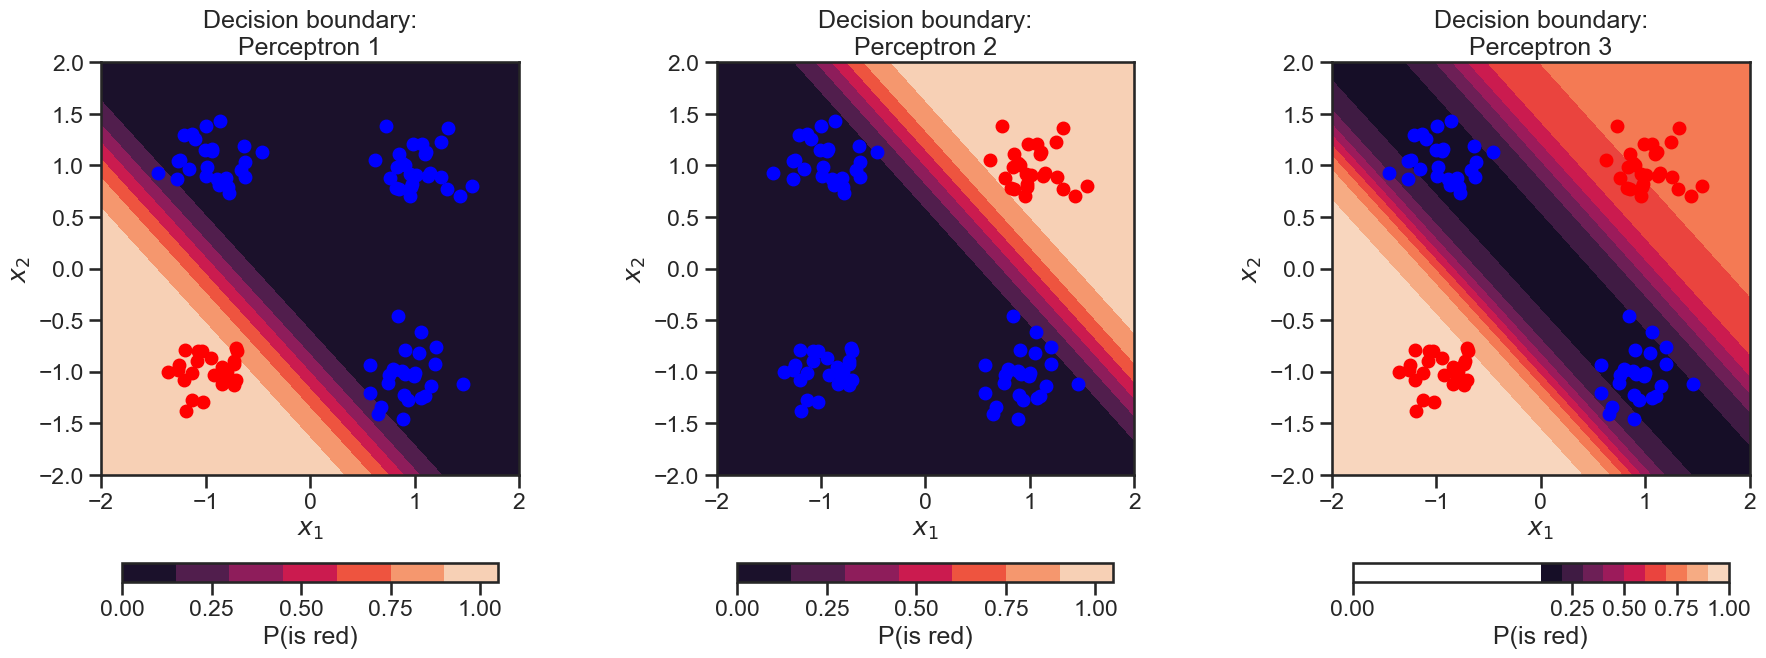

In [13]:
# setup a meshgrid (each x1 and x2 coordinate for which we want to predict a probability)
xx1, xx2 = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))

# predict with Perceptron 1 & 2
zz1 = p1.predict(np.c_[xx1.ravel(), xx2.ravel()])
zz2 = p2.predict(np.c_[xx1.ravel(), xx2.ravel()])
# standardize
zz1_stand = (zz1 - np.mean(zz1, axis=0)) / np.std(zz1, axis=0)
zz2_stand = (zz2 - np.mean(zz2, axis=0)) / np.std(zz2, axis=0)

# predict with Perceptron 3, based of prediction of perceptron 1 & 2
zz3 = p3.predict(np.c_[zz1_stand.ravel(), zz2_stand.ravel()])

# plot
fig, axs = plt.subplots(1, 3, figsize=(18,7))
for i, (y, zz) in enumerate(zip([y1, y2, y3], [zz1, zz2, zz3])):
    ax = axs[i]
    cs = ax.contourf(xx1, xx2, zz.reshape(xx1.shape))
    cbar = fig.colorbar(cs, ax=ax, shrink=0.9, orientation="horizontal")
    cbar.set_label('P(is red)')
    cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
    for j in range(y.shape[0]):
        if y[j] == 0:
            marker = 'bo'
        else:
            marker = 'ro'
        ax.plot(X[j][0], X[j][1], marker)
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_title('Decision boundary:\nPerceptron {}'.format(i+1))
fig.tight_layout(w_pad=4)

# save
fig.savefig(r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Neural_networksfig\Multi-Perceptron-Decision-Boundaries.png', dpi=600)

3. Artificial neural networks

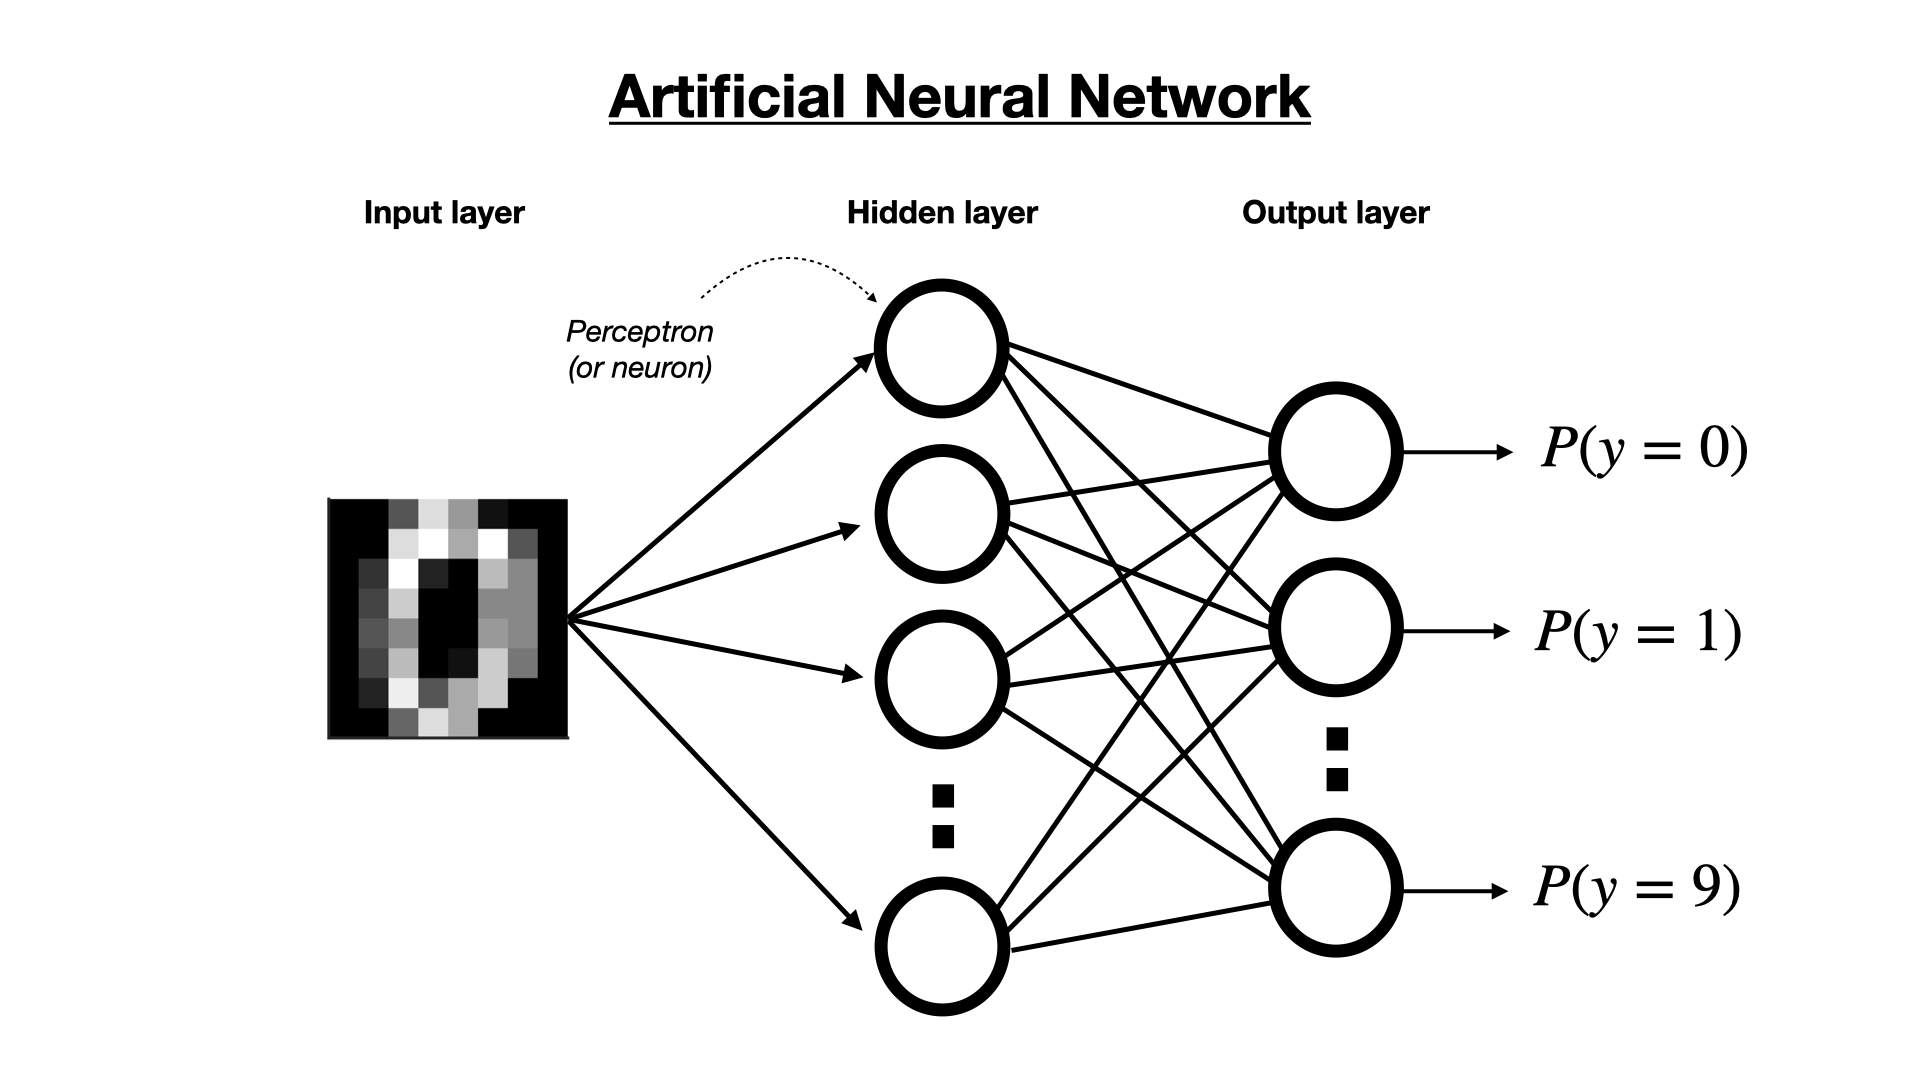

In [14]:
Image(filename=r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Neural_networksfig\Artificial-Neural-Network.png')

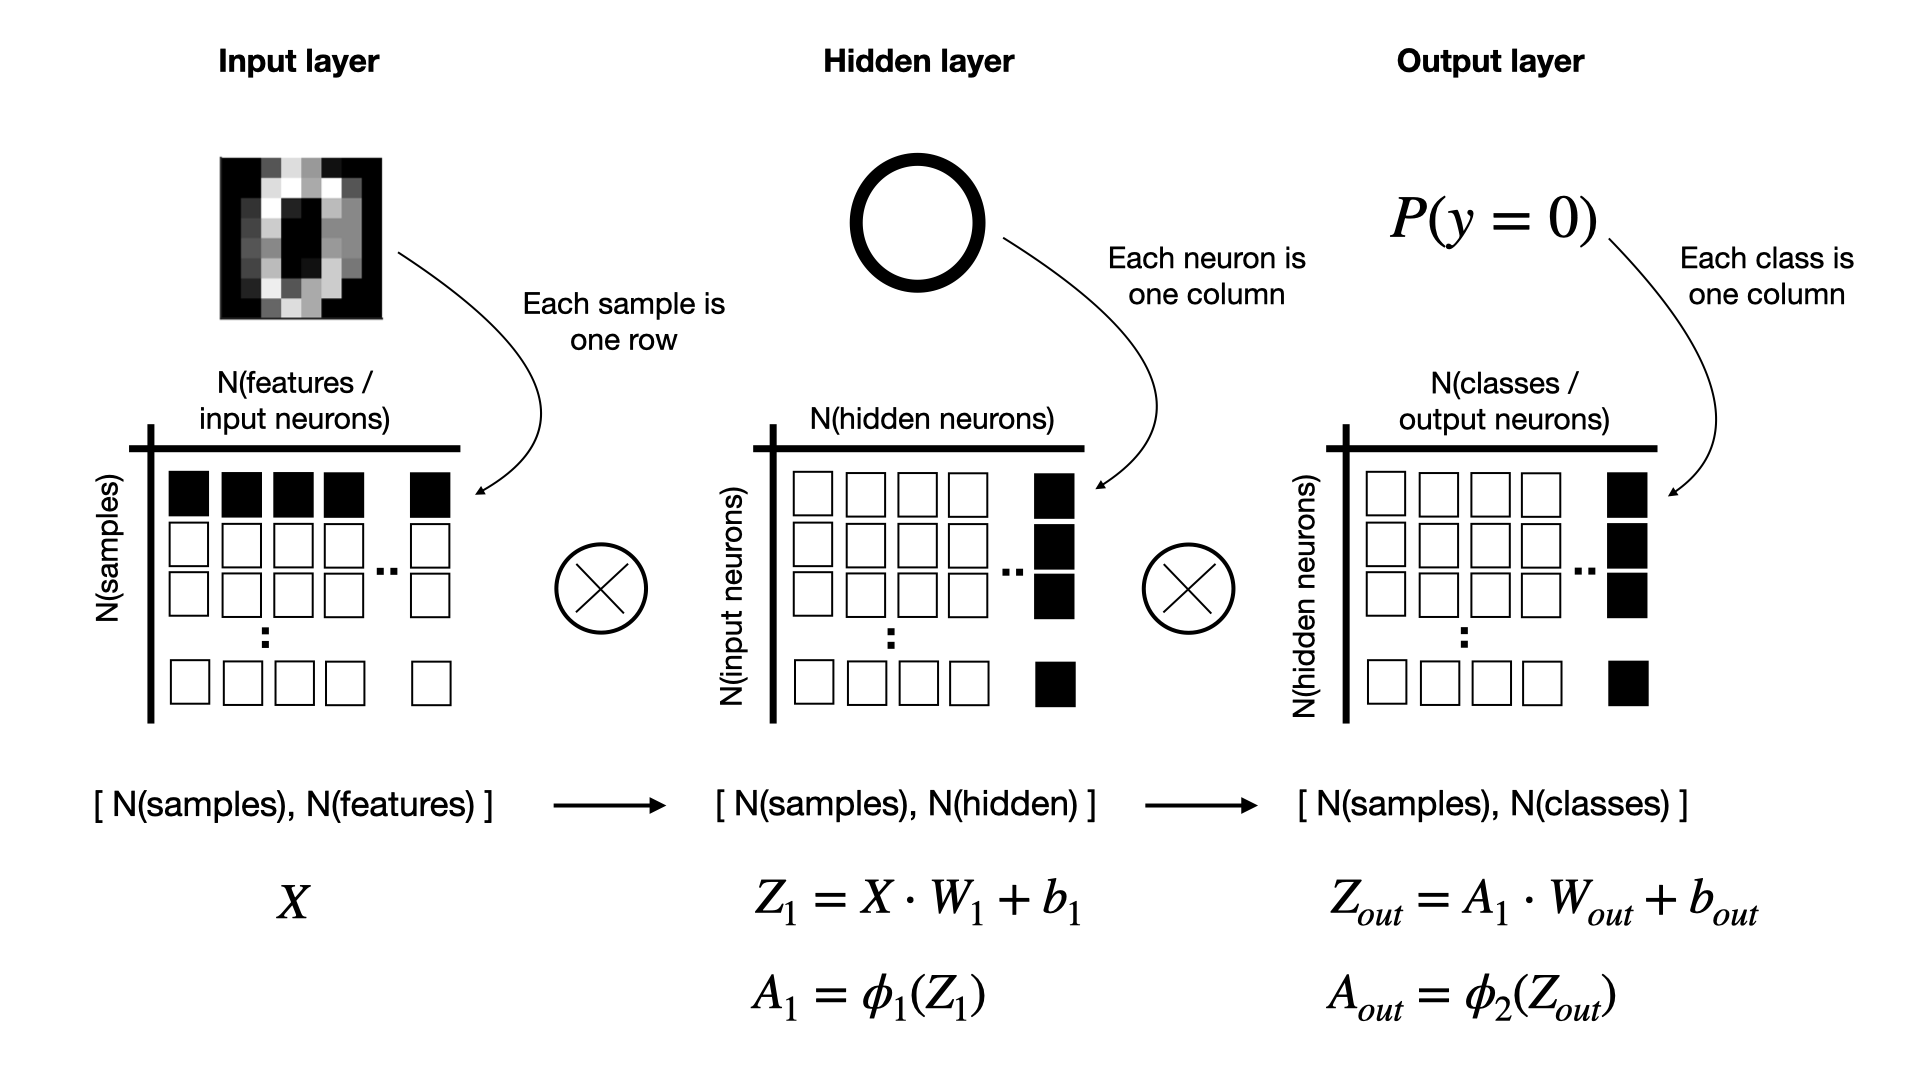

In [15]:
Image(filename=r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Neural_networksfig\ANN-Forward-Pass.png')

In [16]:
# we will use our previous X, containing 100 instances with two values per instance:
print(X.shape)

(100, 2)


In [17]:
np.random.seed(1342)
# weights and bias of hidden layer:
W_hidden  = np.random.normal(size=(2,10))
b_hidden = np.random.normal(size=(1,10)) # one bias for each neuron

np.random.seed(473)
# weights and bias of output layer:
W_output  = np.random.normal(size=(10,1))
b_output = np.random.normal(size=(1,1)) # one bias for each neuron

Z_hidden = X.dot(W_hidden) + b_hidden
A_hidden = sigmoid(Z_hidden) # here we use the sigmoid as out hidden layer activation funcion
A_hidden.shape

(100, 10)

In [18]:
Z_output = A_hidden.dot(W_output) + b_output
A_output = sigmoid(Z_output)
A_output.shape

(100, 1)

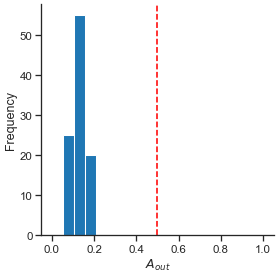

In [19]:
fig, ax = plt.subplots(1,1,figsize=(6,6), dpi=50)
ax.hist(A_output, np.linspace(0,1,20))
ax.set_xlabel(r'$A_{out}$')
ax.set_ylabel('Frequency')
plt.axvline(0.5, color='r', ls='--') # draw classification threshold
despine(ax=ax)

4. Backpropagation

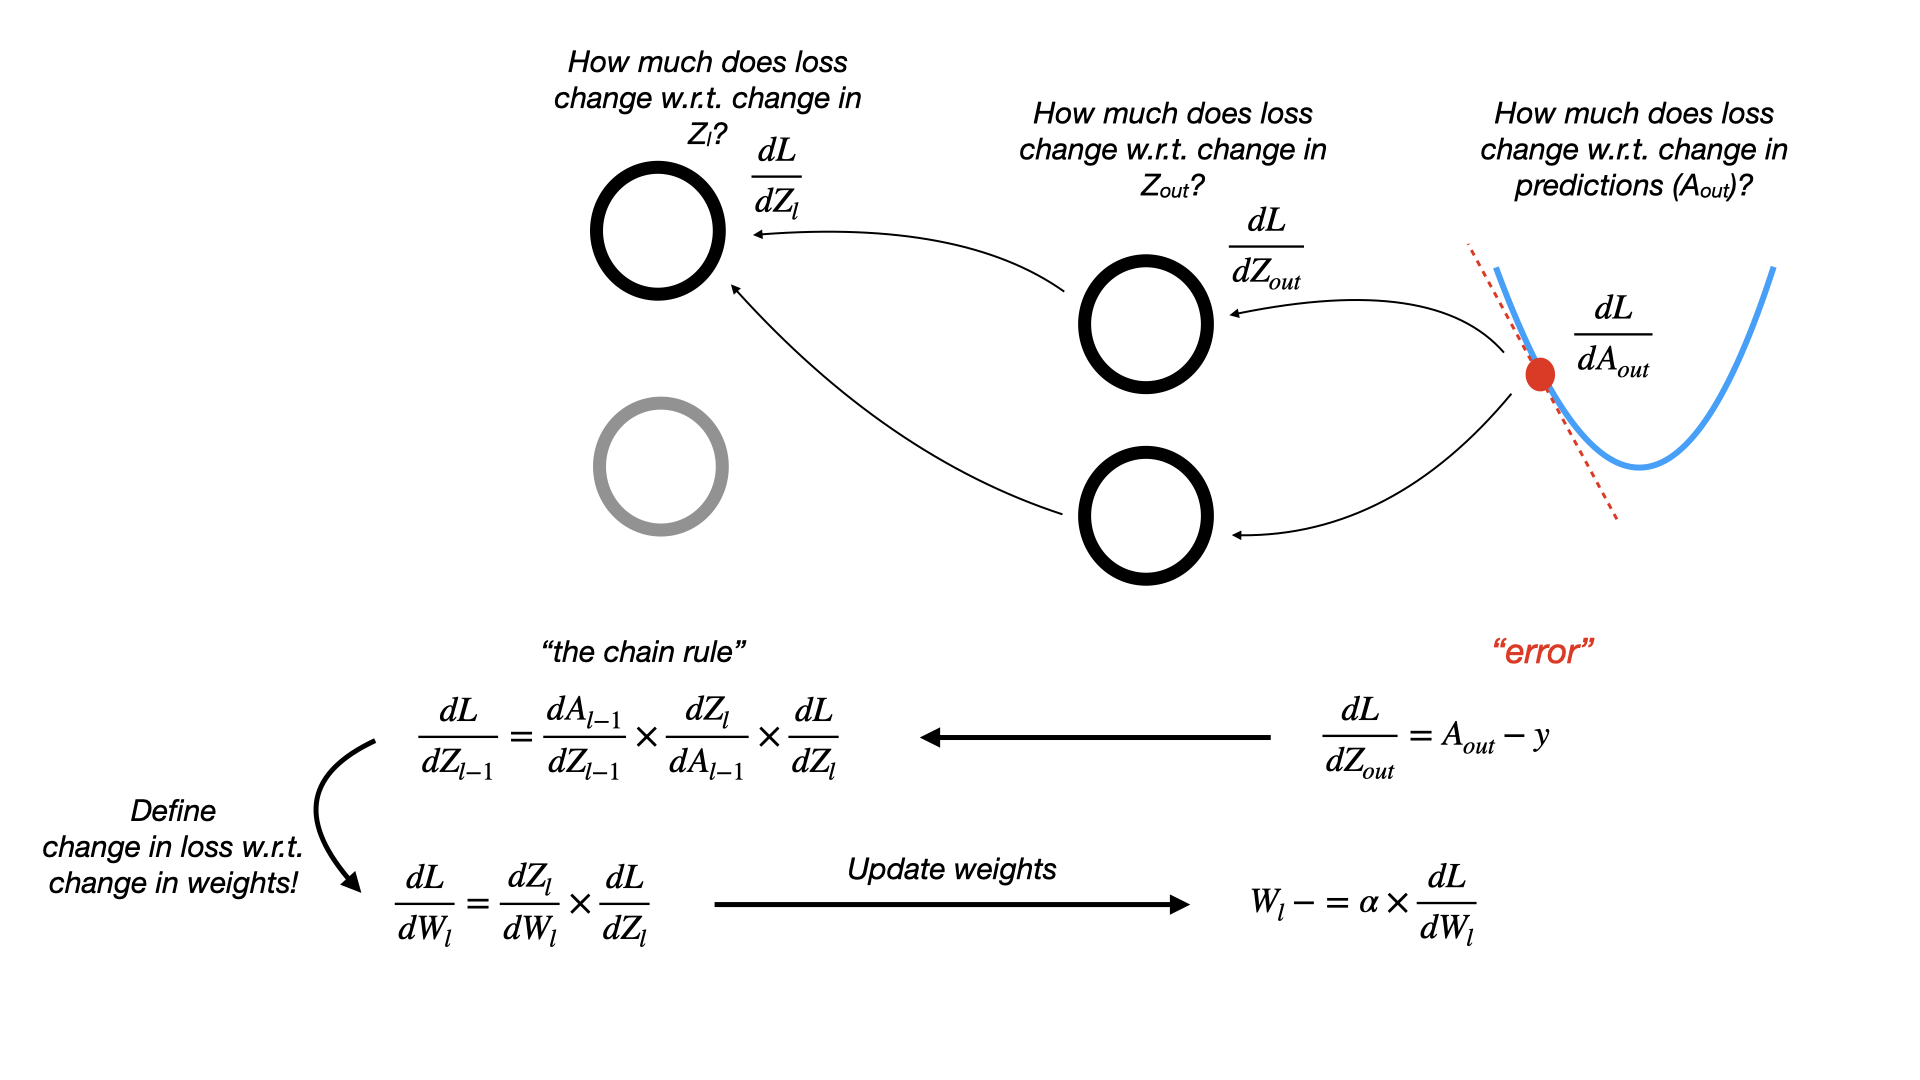

In [20]:
Image(filename=r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Neural_networksfig\Backpropagation.png')

5. Our implementation

In [24]:
# the sigmoid activation function

class sigmoid():
    """the sigmoid function
    """
    def __init__(self):
        self.name = 'sigmoid'
        
    def forward(self, x):
        """forward pass with the sigmoid function
        """
        return 1./(1.+np.exp(-x))
    
    def derivative(self, a):
        """the derviative phi'(a) of the sigmoid function
        """
        return a*(1-a)
    


# the neural network

class NeuralNetwork:
    """A simple Neural Network implementation.
    
    Args: 
        n_in (int): number of input neurons
        n_out (int): number of output neurons
        n_hidden (array of ints): number of neurons for each layer:
            an array of [10, 10] would create two hidden 
            layers with 10 neurons each
        activations (array of classes): activation for each hidden layer
            as well as the output layer; This should contain one activation
            function for each of the hidden layers (as specified by 
            n_hidden) as well as one for the output layer (this should be 
            the last entry of the array). If None, all activations are
            set to the sigmoid function.
            Importantly, each activation needs to be a
            class with two functions for the forward pass and
            the derivative w.r.t. its activations 
            (see the sigmoid implementation above)
        seed (int): random seed to allow for reproducibiliy
            
    """
            
    def __init__(self, n_in, n_out, n_hidden=[10], activations=None, seed=123):
        
        # init
        self.n_in = n_in
        self.n_out = n_out
        self.n_hidden = np.append(np.array(n_hidden), n_out).astype(np.int_) # add output layer
        self.n_layers = self.n_hidden.size
        self.training_loss = [] # we will use this to collect the loss values during gradient descent
        self.seed = seed
        
        # initialize weights & biases
        self.parms = {} # a dictionary containing all network parameters    
        np.random.seed(self.seed)
        n_in = int(self.n_in)
        for layer, n_out in enumerate(self.n_hidden):
            self.parms["W{}".format(layer)] = self._initialize_weight([n_in, n_out])
            self.parms["b{}".format(layer)] = self._initialize_weight([1, n_out])
            # also create empty storage for neuron activations
            self.parms["A{}".format(layer)] = np.zeros((n_in, n_out)) 
            n_in = int(n_out)
        
        # set layer activations
        if activations is None:
            # if no activations are given, use sigmoid
            self.activations = [sigmoid()] * self.n_layers
        else:
            if len(activations) != self.n_layers:
                raise ValueError('/!\ Number of activations does not match number of layers.')
            self.activations = [a() for a in activations]
             
                
    def _initialize_weight(self, size, bound=1):
        """Draw weights randomly from 
        a uniform distribution between -1 and 1
        """
        return np.random.uniform(-1, 1, size=size)
    
    
    def forward(self, X):
        """Forward pass of the neural network,
        given a dataset X
        
        Args: 
            X (ndarray): input data with one instance 
                per row and one column for each feature
                
        Returns:
            predicted probability (n_samples x n_output_neurons)
        """
        self.parms['X'] = X
        for layer in range(self.n_layers):
            Z = X.dot(self.parms['W{}'.format(layer)]) + self.parms['b{}'.format(layer)]
            A = self.activations[layer].forward(Z)
            X = A
            self.parms["A{}".format(layer)] = A
        self.y_pred = A
        return A
        
        
    def predict(self, X):
        """Predict classes for each instance
         of an input dataset X
        
        Args: 
            X (ndarray): input data with one instance 
                per row and one column for each feature
                
        Returns:
            predicted class for each instance
        """
        y_pred = self.forward(X)
        if self.n_out == 1:
            return np.array(y_pred > 0.5).astype(np.int_).ravel()
        else:
            return np.argmax(y_pred, axis=1).ravel()
    
    
    def loss(self, X, y, zerotol=1e-10):
        """Compute mean cross entropy loss,
        over the samples of an input dataset (X) and a set 
        of corresponding class labels (y).
        
        Args: 
            X (ndarray): input data with one instance 
                per row and one column for each feature
            y (ndarray): class label for each instance. 
                Importantly, if n_out > 1, y needs to be 
                one-hot encoded: such that it is of
                shape (n_samples x n_out)
        
        Returns:
            Average cross entropy loss"""
        if self.activations[-1].name not in ['sigmoid', 'softmax']:
            raise ValueError('loss function only valid for sigmoid or softmax output activations.')
        y_pred = self.forward(X)
        # binary cross-entropy loss
        if self.n_out == 1:
            loss = -y * np.log(y_pred + zerotol) 
            loss -= (1 - y) * np.log(1 - y_pred + zerotol)
        # multi-class extension
        else:
            loss = -np.sum(y * np.log(y_pred), axis=1)
        return 1.0/X.shape[0] * np.sum(loss, axis=0)
    
    
    def derivative_loss(self, x, y):
        """Derivative of cross entropy loss"""
        if self.activations[-1].name not in ['sigmoid', 'softmax']:
            raise ValueError('derivative of loss only valid for sigmoid / softmax output activations.')
        y_pred = self.forward(x)
        return y_pred - y
        
        
    def backward(self, X, y, lr=0.1):
        """Compute gradient descent backward pass,
        updating all network weights, given an
        input dataset (X) and a set of corresponding 
        class labels (y).
        
        Args: 
            X (ndarray): input data with one instance 
                per row and one column for each feature
            y (ndarray): class label for each instance. 
                Importantly, if n_out > 1, y needs to be 
                one-hot encoded: such that it is of
                shape (n_samples x n_out)
            lr (float): learning rate for weight update
        """
        y_pred = self.forward(X)
        self.training_loss.append(self.loss(X, y))
        dZ = self.derivative_loss(X, y)
        for layer in range(1, self.n_layers)[::-1]: # iterate hidden layers backward
            # dL/dW and dL/db are computed as averages over the batch
            # dL/dW is computed by multiplying dZ with the input to the layer 
            # (here, A from the next lower layer)
            dW = 1.0/dZ.shape[0] * self.parms["A{}".format(layer-1)].T.dot(dZ)
            db = 1.0/dZ.shape[0] * np.sum(dZ, axis=0, keepdims=True)
            self.parms["W{}".format(layer)] -= self.lr * dW
            self.parms["b{}".format(layer)] -= self.lr * db
            # compute dZ for next lower layer
            dA = dZ.dot(self.parms["W{}".format(layer)].T)
            dZ = dA * self.activations[layer-1].derivative(self.parms["A{}".format(layer-1)])
        # input layer
        dW = 1.0/dZ.shape[0] * X.T.dot(dZ)
        db = 1.0/dZ.shape[0] * np.sum(dZ, axis=0, keepdims=True)
        self.parms["W0"] -= self.lr * dW
        self.parms["b0"] -= self.lr * db
          
            
    def fit(self, X, y, lr=0.1, n_steps=10000, batch_size=32, verbose=False):
        """Fit the neural network to an input dataset.
        
        Args: 
            X (ndarray): input data with one instance 
                per row and one column for each feature
            y (ndarray): class label for each instance. 
                Importantly, if n_out > 1, y needs to be 
                one-hot encoded: such that it is of
                shape (n_samples x n_out)
            lr (float): learning rate for weight update
            n_steps (int): number of gradient descent steps
                to perform
            batch_size (int): number of random samples 
                drawn from the dataset at each gradient descent iteration
            verbose (bool): whether or not to give a printed update
                about the state of the training"""
        # make sure y is right shape
        if self.n_out == 1 and np.ndim(y) < 2:
            y = y.reshape(-1,1)  
        assert np.ndim(y) == 2, '/!\ y needs to be 2 dimenional'
        # make sure data and model match
        if y.shape[1]>1:
            if np.unique(y.argmax(axis=1)).size != self.n_out:
                raise ValueError('/!\ n_out does not match number of labels in y (dim-1)')
        if verbose:
            print('Beginning training for {} batches ({} samples/batch):'.format(n_steps, batch_size))
        self.lr = lr
        iterator = range(n_steps)
        for step in (tqdm(iterator) if verbose else iterator):
            batch_i = np.random.choice(X.shape[0], batch_size, replace=False)
            self.forward(X[batch_i])
            self.backward(X[batch_i], y[batch_i], lr=self.lr)
         
        
    def plot_training_stats(self, X, y, train_idx, test_idx, target_names=None):
        """Plot the training loss as well as a confusion matrix
        for the training and test datasets.
        
        Args: 
            X (ndarray): input data with one instance 
                per row and one column for each feature
            y (array): class label for each instance. 
            train_idx (array): index indicating the
                position of the training instances in X and y
            test_idx (array): index indicating the
                position of the test instances in X and y
            target_names (array of strings): names of 
                target classes in y
                
        Returns:
            Matrplotlib figure and axes
        """
        fig, axs = plt.subplots(1,3,figsize=(20,6))
        # plot training loss
        axs[0].set_title('Training loss')
        axs[0].set_ylabel('Loss')
        axs[0].set_xlabel('Training step')
        axs[0].plot(self.training_loss, color='k')
        despine(ax=axs[0])
        # plot confusion matrix for training and test data
        for i, (label, idx) in enumerate(zip(['Training', 'Test'], [train_idx, test_idx])):
            y_pred = self.predict(X[idx])
            acc = np.mean(y_pred == y[idx])
            axs[1+i].set_title('{} data\nMean Acc.: {}%'.format(label, np.round(acc*100, 2)))
            conf_mat = confusion_matrix(y[idx], y_pred, normalize='true')
            sns.heatmap(conf_mat, annot=True, ax=axs[1+i], vmin=0, vmax=1,
                        annot_kws={'fontsize': 100./self.n_out}) # this might be too large for few classes
            if target_names is not None:
                axs[1+i].set_xticklabels(target_names)
                axs[1+i].set_yticklabels(target_names)
        fig.tight_layout()
        return fig, axs

6. What happens if we change the hidden layer activation function?

This is how one-hot encoding looks like for class 0:
[1. 0.]
And this is how it looks for class 1:
[0. 1.]

Overall, y now has dimension: 100x2


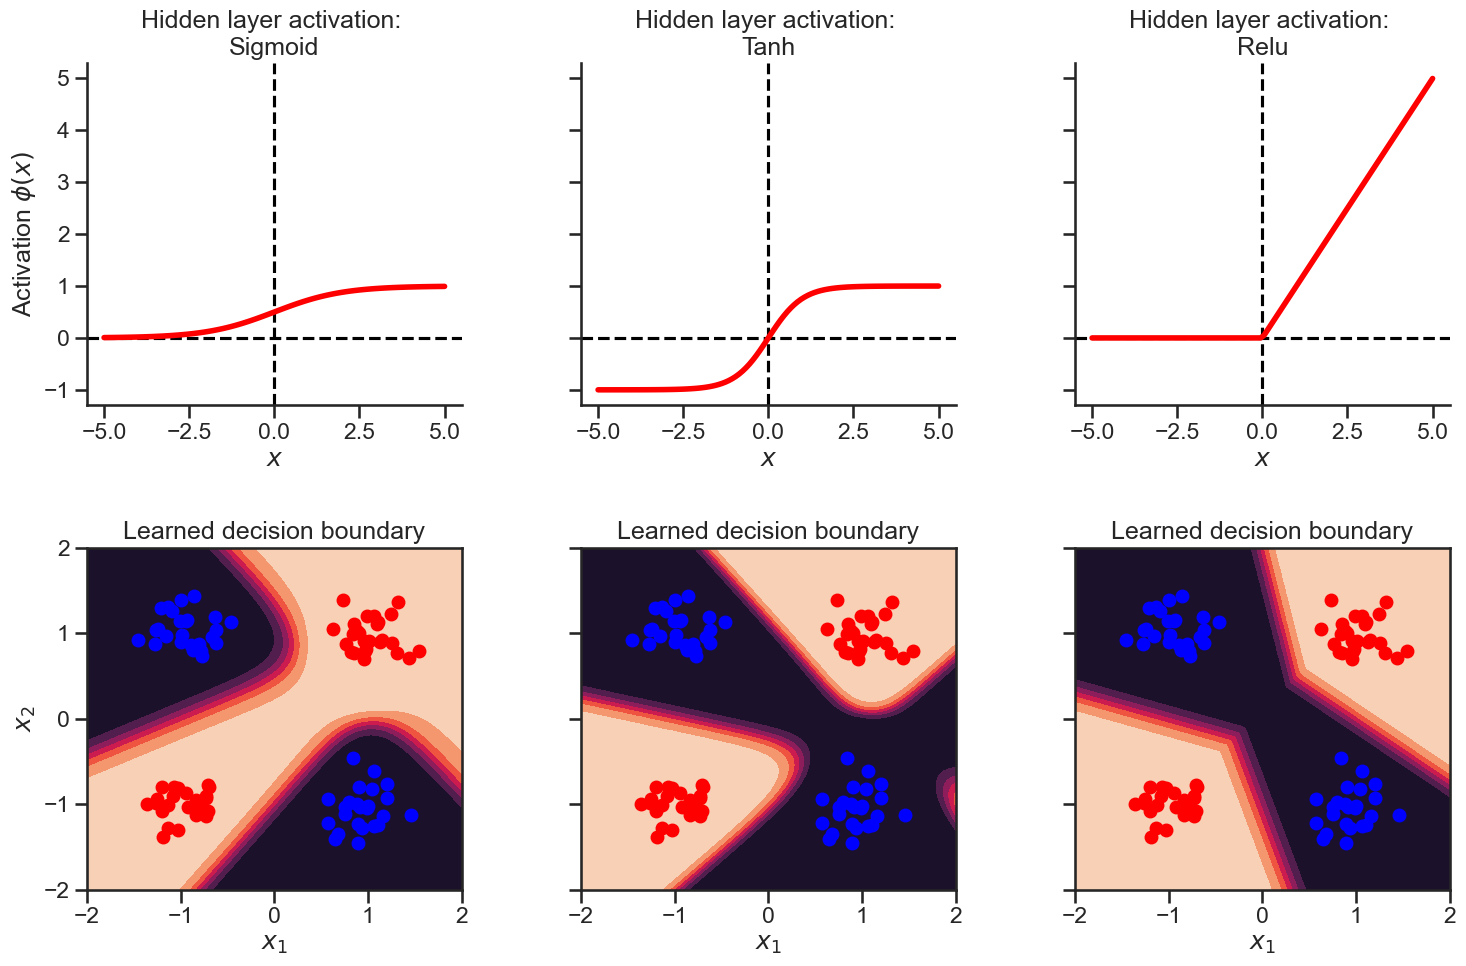

In [28]:
# three common activation functions:

class relu():
    def __init__(self):
        self.name = 'relu'
        
    def forward(self, x):
        return np.maximum(x, 0)
    
    def derivative(self, a):
        d = np.zeros_like(a)
        d[a<0] = 0
        d[a>0] = 1
        return d
    
    
class tanh():
    def __init__(self):
        self.name = 'tanh'
        
    def forward(self, x):
        return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    
    def derivative(self, a):
        return 1-a**2
    
    
class softmax():
    def __init__(self):
        self.name = 'softmax'
        
    def forward(self, x):
        e_x = np.exp(x)
        return e_x / e_x.sum(axis=1, keepdims=True)
    
    def derivative(self, a):
        SM = a.reshape((-1,1))
        return (np.diagflat(a) - np.dot(SM, SM.T)).sum(axis=1)
    
y_onehot = np.zeros((y.size, 2))
y_onehot[np.arange(y.size), y.ravel()] = 1
print('This is how one-hot encoding looks like for class 0:')
print(y_onehot[0])
print('And this is how it looks for class 1:')
print(y_onehot[n_samples])
print('\nOverall, y now has dimension: {}x{}'.format(*y_onehot.shape))






# set a random seed
seed = 159
np.random.seed(seed)

# setup figure
fig, axs = plt.subplots(2,3,figsize=(15,10), sharey='row', sharex='row')

# iterate activation functions
for i, act in enumerate([sigmoid, tanh, relu]):
    
    # plot activation function of hidden layer
    ax = axs[0,i]
    x = np.linspace(-5,5,100)
    ax.axhline(0, color='k', ls='--')
    ax.axvline(0, color='k', ls='--')
    ax.plot(x, act().forward(x), color='red', lw=4)
    ax.set_title('Hidden layer activation: \n{}'.format(act().name.capitalize()))
    ax.set_xlabel(r'$x$')
    despine(ax=ax)
    
    # make and fit neural network instance
    nn = NeuralNetwork(n_in=2, n_out=2, n_hidden=[3], activations=[act, softmax], seed=seed)
    nn.fit(X, y_onehot, verbose=False)
    
    # perdict probabilities
    zz = nn.forward(np.c_[xx1.ravel(), xx2.ravel()])
    zz = zz[:,1].reshape(xx1.shape)
    
    # plot decision boundary
    ax = axs[1,i]
    cs = ax.contourf(xx1,xx2,zz)
    for i in range(y.shape[0]):
        if y[i] == 0:
            marker = 'bo'
        else:
            marker = 'ro'
        ax.plot(X[i][0], X[i][1], marker)
    ax.set_title('Learned decision boundary')
    ax.set_xlabel(r'$x_1$')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)

# some final plotting settings
axs[0,0].set_ylabel('Activation '+r'$\phi(x)$')
axs[1,0].set_ylabel(r'$x_2$')

# save figure
fig.tight_layout(h_pad=2, w_pad=4)
fig.savefig(r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Neural_networksfig\Neural-Network-Hidden-Activations.png', dpi=600)


7. Exercise: Classify handwritten digits

In [29]:
from sklearn.datasets import load_digits
data = load_digits()

data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [30]:
data['target']

array([0, 1, 2, ..., 8, 9, 8])

In [31]:
data['data'].shape

(1797, 64)

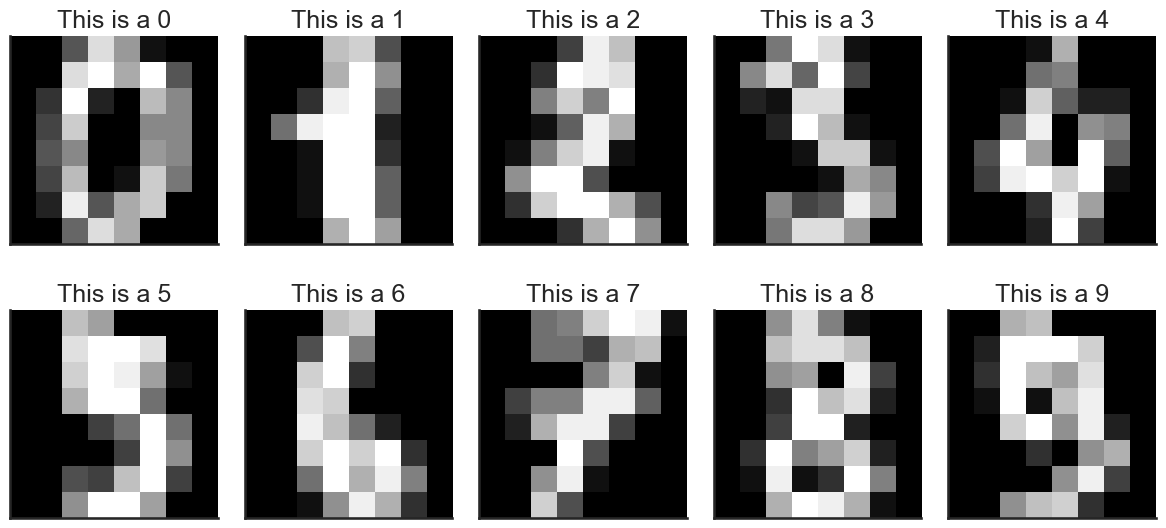

In [32]:
# setup figure
fig, axs = plt.subplots(2,5,figsize=(12,6))
axs = axs.ravel()

# plot 10 examples
for i in range(10):
    axs[i].imshow(data['data'][i].reshape(8,8), cmap='gray')
    axs[i].set_title('This is a {}'.format(data['target'][i]))
    despine(ax=axs[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
fig.tight_layout()

# save
fig.savefig(r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Neural_networksfig\Hand-Written-Digits.png', dpi=600)

In [37]:
# create X & y data
X = data['data']
y = data['target']

# create a one-hot version of y
y_onehot = np.zeros((y.size, np.unique(y).size))
y_onehot[np.arange(y.size), y] = 1
assert np.all(np.argmax(y_onehot, axis=1) == y), '/!\ Error in one-hot encoding'


np.random.seed(1827)
# train / test split
train_idx = np.random.choice(X.shape[0], int(0.7 * X.shape[0]), replace=False)
test_idx = np.array([i for i in np.arange(X.shape[0]) if i not in train_idx])
assert np.all([i not in train_idx for i in test_idx]), '/!\ Overlapping training and test datasets.'


# set a random seed
seed = 2130
np.random.seed(seed)

# setup
nn = NeuralNetwork(n_in=X.shape[1], # the number of input neurons (or data features)
                   n_out=y_onehot.shape[1], # the number of ourput neurons (or classes, here 10)
                   n_hidden=[10], # 10 hidden neurons in a single hidden layer
                   activations=[sigmoid, softmax], # we use the sigmoid activation function for the hidden layer
                   seed=seed)

# training:
nn.fit(X=X[train_idx], y=y_onehot[train_idx], lr=0.01,  n_steps=20000, verbose=True)

Beginning training for 20000 batches (32 samples/batch):


  0%|          | 0/20000 [00:00<?, ?it/s]

100%|██████████| 20000/20000 [00:05<00:00, 3872.49it/s]


(<Figure size 2000x600 with 5 Axes>,
 array([<Axes: title={'center': 'Training loss'}, xlabel='Training step', ylabel='Loss'>,
        <Axes: title={'center': 'Training data\nMean Acc.: 83.37%'}>,
        <Axes: title={'center': 'Test data\nMean Acc.: 76.85%'}>],
       dtype=object))

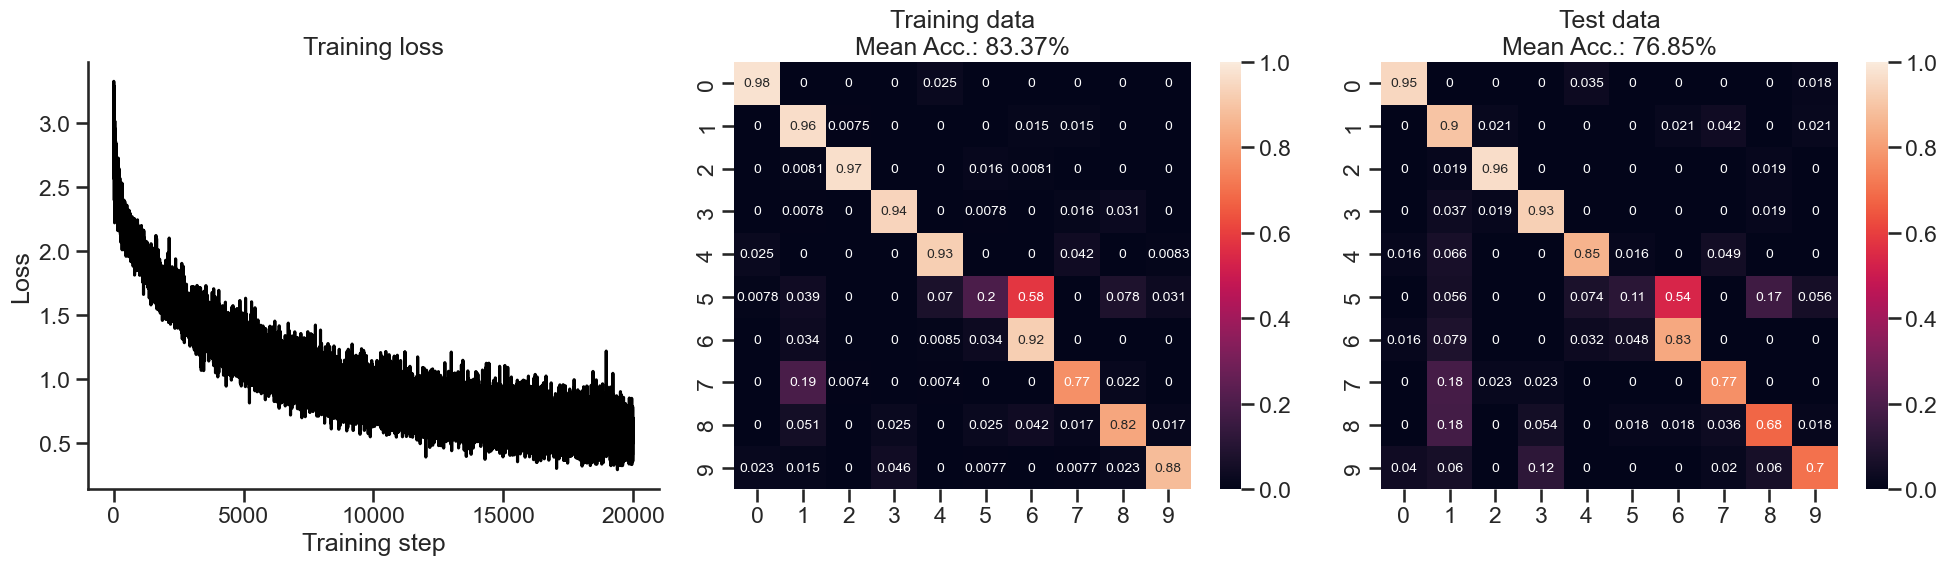

In [38]:
nn.plot_training_stats(X=X, y=y,
                       train_idx=train_idx,
                       test_idx=test_idx,
                       target_names=data['target_names'])